In [1]:
# push!(LOAD_PATH, "./src")

In [50]:
include("./src/dataSplit.jl")
include("./src/MyPlot.jl")

Main.MyPlot

In [21]:
# # include("./src/dataSplit.jl")
# using dataSplit
# using MyPlot

# using CSV;
# using LinearAlgebra;
# using Distributions;
# using Random;
# using Plots;

# importall

In [4]:
dataSplit.dataSplitTest()

dataSplit used!

In [5]:
MyPlot.MyPlotTest()

MyPlot used!

In [6]:
df = dataSplit.getDF("./data_proj_414.csv");
title = names(df);

In [7]:
data = df;
data_X = data[:,2];
data_Y = data[:,3];
data_Potter = data[:,4];
data_Weasley = data[:,5];
data_Granger = data[:,6];
data_Trip = data[:,7];
data_Close = data[:,8];
data_Far = data[:,9];

In [8]:
P = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);
W = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Weasley,1);
G = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Granger,1);

In [9]:
print(length(data_X),", ",length(P[1]),", ",length(W[2]),", ",length(G[3]),", ",length(P[1])+length(W[2])+length(G[3]))

24094, 8000, 8336, 7758, 24094

In [10]:
P_trip = dataSplit.get_trip(P);
W_trip = dataSplit.get_trip(W);
G_trip = dataSplit.get_trip(G);

PicAll3 (generic function with 6 methods)

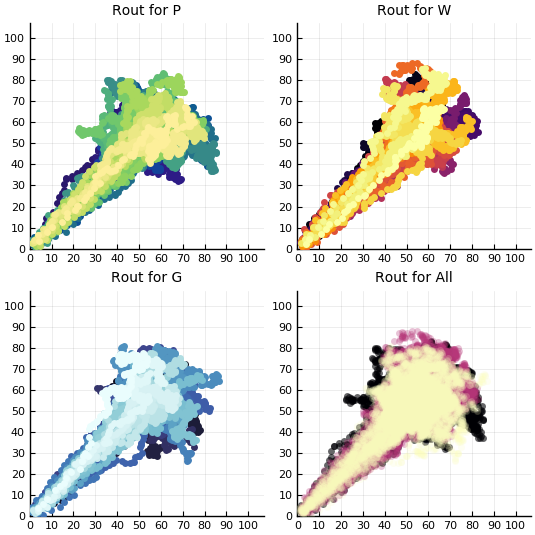

In [58]:
using Plots
# gr();
pyplot()
p1 = MyPlot.getPic(P_trip, :haline, 1, 5, "Rout for P", 10)
p2 = MyPlot.getPic(W_trip, :inferno, 1, 5, "Rout for W", 10)
p3 = MyPlot.getPic(G_trip, :ice, 1, 5, "Rout for G", 10)
p4 = MyPlot.PicAll3(P,W,G,:magma,1,5,"Rout for All",10)

plot(p1,p2,p3,p4,layout=(2,2),legend=false, fmt = :png)

In [65]:
# savefig("pic/fig1.eps")
# savefig("pic/fig1.png")
# savefig("pic/fig1.svg")

In [13]:
function get_weight(X,Y,Weight)
    P_trip = []
    kk = maximum(Weight)
    for i = 1:kk
        current_trip = dataSplit.ListDataSplite([X,Y,Weight],Weight,i);
        push!(P_trip,current_trip)
    end
    return P_trip
end

get_weight (generic function with 1 method)

In [14]:
# P: data_X,data_Y,data_Trip,data_Close,data_Far
# P = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);

# P_W = get_weight(X,Y,Weight);
# X

In [54]:
function getWeightPic(X,Y,Weight, color = :inferno, markersize = 1,size_x = 5)
    ## color is a list of color, you should change the color and data
    ## you can find colors at: http://docs.juliaplots.org/latest/colors/#misc
    markersize = markersize*size_x
    kk = Int(maximum(Weight))
    P_W = get_weight(X,Y,Weight)
    colors = RGBA[cgrad(color)[z] for z=range(0,stop=1,length=kk)]
    pic = scatter()
    # First, plot the heat graph
    for i = 2:kk
        color_s = colors[i]
        if i == 1
            color_s = :green
        end
        pic = scatter!(P_W[i][1], P_W[i][2], markersize = markersize, markerstrokewidth = 0,
            markercolor = color_s, size=(107*size_x,107*size_x), leg=true, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,label=i-1,zcolor = i-1,m=(color, 0.8))
    end
    # second, plot the non-apple graph
    i = 1
    color_s = :azure3
    pic = scatter!(P_W[i][1], P_W[i][2], markersize = markersize, markerstrokewidth = 0,
            markercolor = color_s, size=(107*size_x,107*size_x), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,label=i-1,α=0.3)
    return pic
end

getWeightPic (generic function with 4 methods)

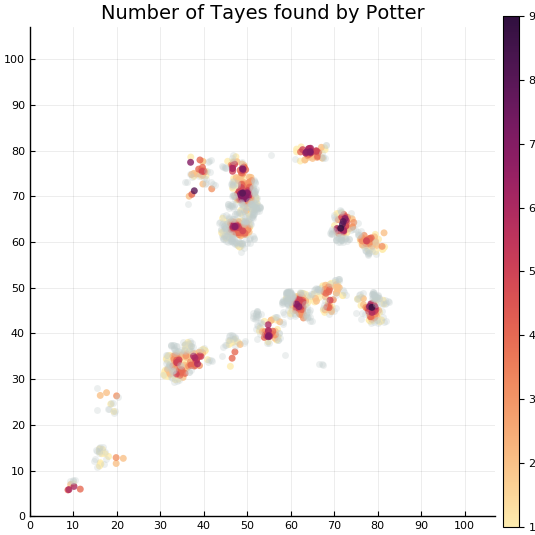

In [62]:
using Plots
pyplot();
X = P[1]
Y = P[2]
Weight = P[5]
pw = getWeightPic(X,Y,Weight,:matter,3);
plot(pw, title = "Number of Tayes found by Potter",fmt = :png)

In [64]:
# savefig("pic/fig2.eps")
# savefig("pic/fig2.png")
# savefig("pic/fig2.svg")

# savefig("pic/fig3.eps")
# savefig("pic/fig3.png")
# savefig("pic/fig3.svg")